# Setting

## G Drive Mount

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/lgaimers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/lgaimers


## import packages and fix seed

In [ ]:
import pandas as pd
import random
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

# seed 고정
rand_seed = 3100
seed_everything(rand_seed)

## Load Data

In [ ]:
df_train = pd.read_csv('./origin/train.csv')
df_x_info = pd.read_csv('./origin/meta/x_feature_info.csv')
df_y_info = pd.read_csv('./origin/meta/y_feature_info.csv')
df_y_spec_info = pd.read_csv('./origin/meta/y_feature_spec_info.csv')

X = df_train.filter(regex='X')
y = df_train.filter(regex='Y')

# Simple info

In [ ]:
df_train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [ ]:
# df_train.iloc[:, :10].info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39607 entries, 0 to 39606
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39607 non-null  object 
 1   X_01    39607 non-null  float64
 2   X_02    39607 non-null  float64
 3   X_03    39607 non-null  float64
 4   X_04    39607 non-null  int64  
 5   X_05    39607 non-null  float64
 6   X_06    39607 non-null  float64
 7   X_07    39607 non-null  float64
 8   X_08    39607 non-null  float64
 9   X_09    39607 non-null  float64
 10  X_10    39607 non-null  float64
 11  X_11    39607 non-null  float64
 12  X_12    39607 non-null  float64
 13  X_13    39607 non-null  float64
 14  X_14    39607 non-null  float64
 15  X_15    39607 non-null  float64
 16  X_16    39607 non-null  float64
 17  X_17    39607 non-null  float64
 18  X_18    39607 non-null  float64
 19  X_19    39607 non-null  float64
 20  X_20    39607 non-null  float64
 21  X_21    39607 non-null  float64
 22

In [ ]:
df_x_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [ ]:
X.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


In [ ]:
df_y_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [ ]:
df_y_spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [ ]:
X.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,...,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,...,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,...,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,...,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,...,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,...,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,...,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,...,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


In [ ]:
y.describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,1.349000,1.044000,0.998000,13.837000,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,1.576000,1.300000,1.239000,15.626000,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


In [ ]:
df_train.shape, X.shape, y.shape

((39607, 71), (39607, 56), (39607, 14))

In [ ]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df_train)

결측치가 존재하지 않습니다


# Group Info

In [ ]:
# Group 분류
group_dict = {
    "Group_1" : ["X_01", "X_02", "X_05", "X_06"],
    "Group_2" : ["X_03", "X_10", "X_11"],
    "Group_3" : ["X_04", "X_23", "X_47", "X_48"],
    "Group_4" : ["X_07", "X_08", "X_09"],
    "Group_5" : ["X_12"],
    "Group_6" : ["X_13"],
    "Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"],
    "Group_8" : ["X_19", "X_20", "X_21", "X_22"],
    "Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"],
    "Group_10" : ["X_30", "X_31", "X_32", "X_33"],
    "Group_11" : ["X_34", "X_35", "X_36", "X_37"],
    "Group_12" : ["X_38", "X_39", "X_40"],
    "Group_13" : ["X_41", "X_42", "X_43", "X_44"],
    "Group_14" : ["X_45"],
    "Group_15" : ["X_46"],
    "Group_16" : ["X_49"],
    "Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"],
}



In [ ]:
def show_hist(group_name):
    temp = group_dict[group_name]
    for x_feat in temp:
        print(x_feat, ":", df_x_info[df_x_info["Feature"]==x_feat].iloc[0,1])

    row_num = round(len(temp)/2 + 0.1)
    fig, axes = plt.subplots(row_num, 2, figsize=(20,5*row_num))
    fig.suptitle(group_name, fontsize=40)

    for ax,feature in zip(axes.flatten(),temp):
        sns.histplot(data=X, x=feature, ax=ax, color='#f55354', edgecolor='#f15354')
    plt.show()



## Group 1 : PCB 체결 시 단계별 누름량(Step n)

In [ ]:
X.loc[:, group_dict["Group_1"]]

,X_01,X_02,X_05,X_06
0,70.544,103.320,101.892,74.983
1,69.524,103.321,101.944,72.943
2,72.583,103.320,103.153,72.943
3,71.563,103.320,101.971,77.022
4,69.524,103.320,101.981,70.904
...,...,...,...,...
39602,66.465,103.320,103.150,66.825
39603,66.465,103.321,102.021,66.825
39604,68.504,103.320,103.144,68.864
39605,66.465,103.320,102.025,67.845


X_01 : PCB 체결 시 단계별 누름량(Step 1)
X_02 : PCB 체결 시 단계별 누름량(Step 2)
X_05 : PCB 체결 시 단계별 누름량(Step 3)
X_06 : PCB 체결 시 단계별 누름량(Step 4)


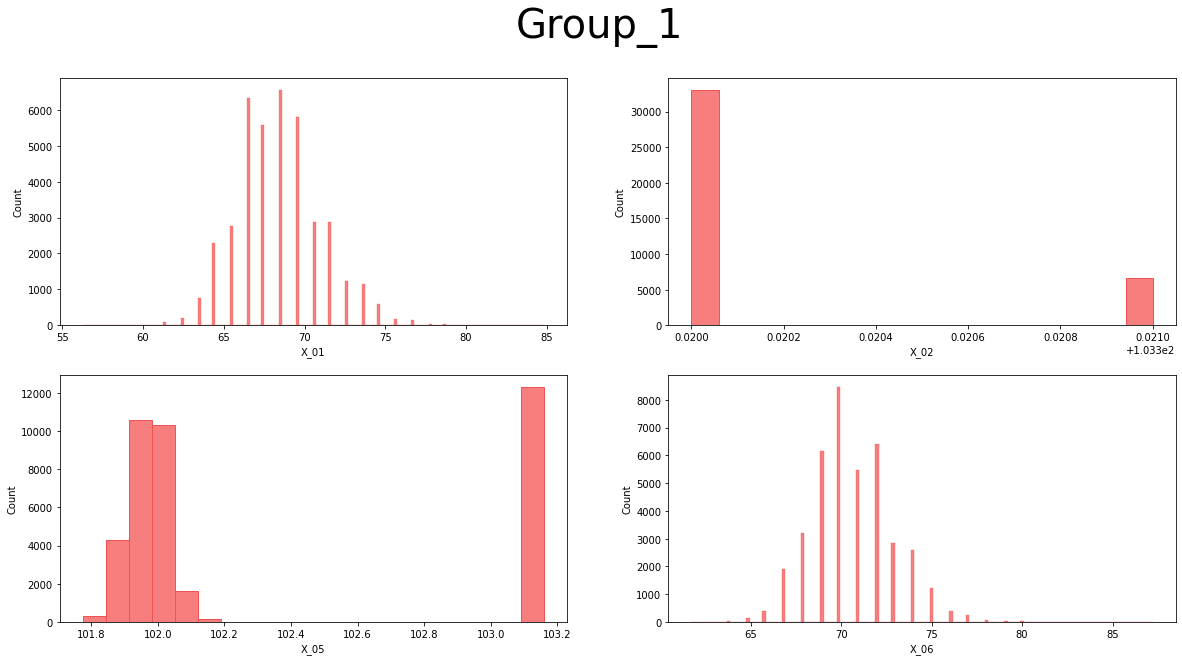

In [ ]:
show_hist("Group_1")

## Group 2 : 방열 재료 n 무게

In [ ]:
X.loc[:, group_dict["Group_2"]]

,X_03,X_10,X_11
0,67.47,0.0,0.0
1,65.17,0.0,0.0
2,64.07,0.0,0.0
3,67.57,0.0,0.0
4,63.57,0.0,0.0
...,...,...,...
39602,62.27,0.0,0.0
39603,62.77,0.0,0.0
39604,64.67,0.0,0.0
39605,63.67,0.0,0.0


X_03 : 방열 재료 1 무게
X_10 : 방열 재료 2 무게
X_11 : 방열 재료 3 무게


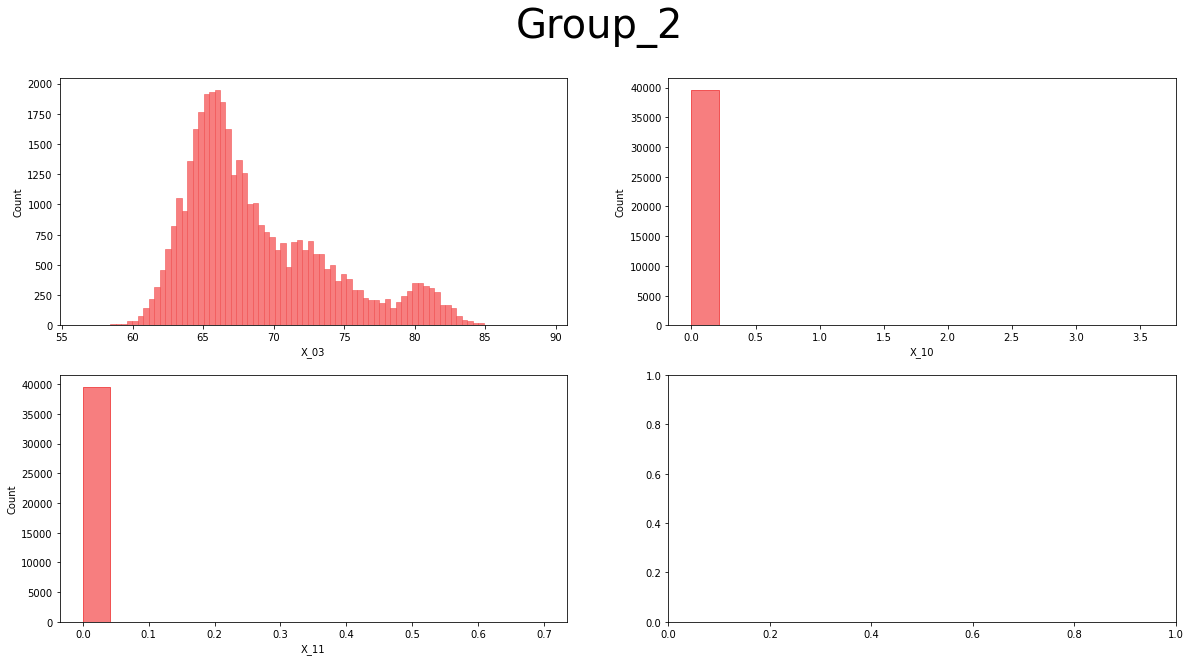

In [ ]:
show_hist("Group_2")

## Group 3 : 검사 통과 여부

In [ ]:
X.loc[:, group_dict["Group_3"]]

,X_04,X_23,X_47,X_48
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
39602,1,1,1,1
39603,1,1,1,1
39604,1,1,1,1
39605,1,1,1,1


X_04 : 1차 검사 통과 여부
X_23 : 2차 검사 통과 여부
X_47 : 3차 검사 통과 여부
X_48 : 4차 검사 통과 여부


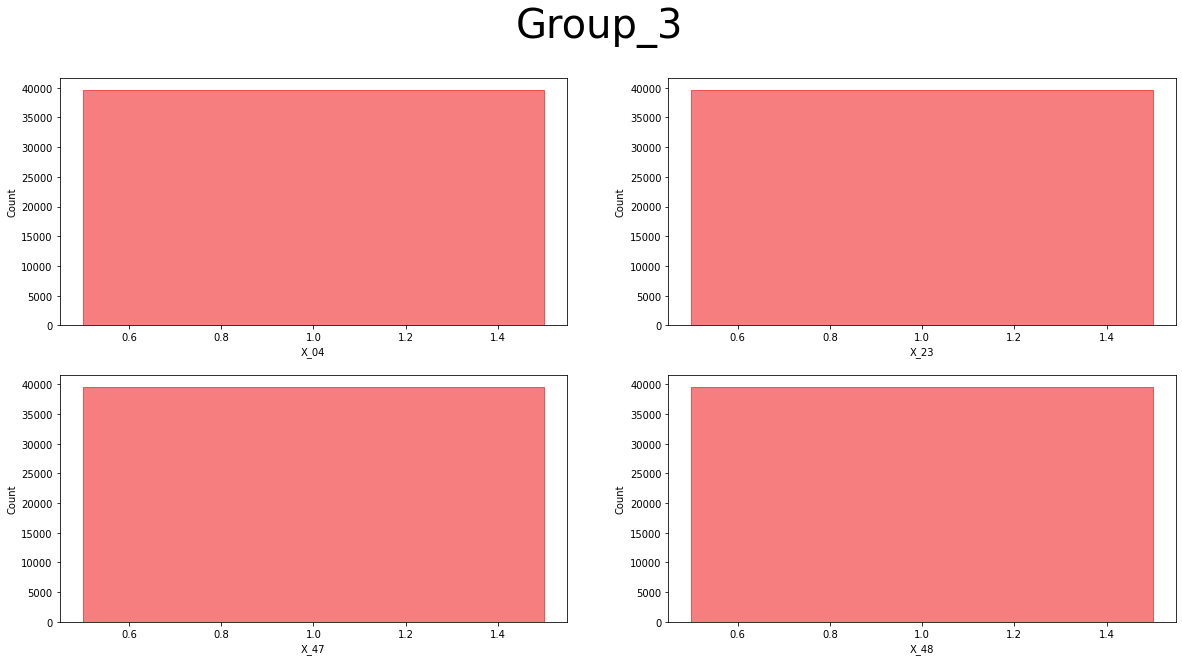

In [ ]:
show_hist("Group_3")

## Group 4 : 방열 재료 n 면적

In [ ]:
X.loc[:, group_dict["Group_4"]]

,X_07,X_08,X_09
0,29.45,62.38,245.71
1,28.73,61.23,233.61
2,28.81,105.77,272.20
3,28.92,115.21,255.36
4,29.68,103.38,241.46
...,...,...,...
39602,30.20,77.83,298.05
39603,29.21,102.25,270.67
39604,29.96,102.61,198.07
39605,30.30,112.60,275.52


X_07 : 방열 재료 1 면적
X_08 : 방열 재료 2 면적
X_09 : 방열 재료 3 면적


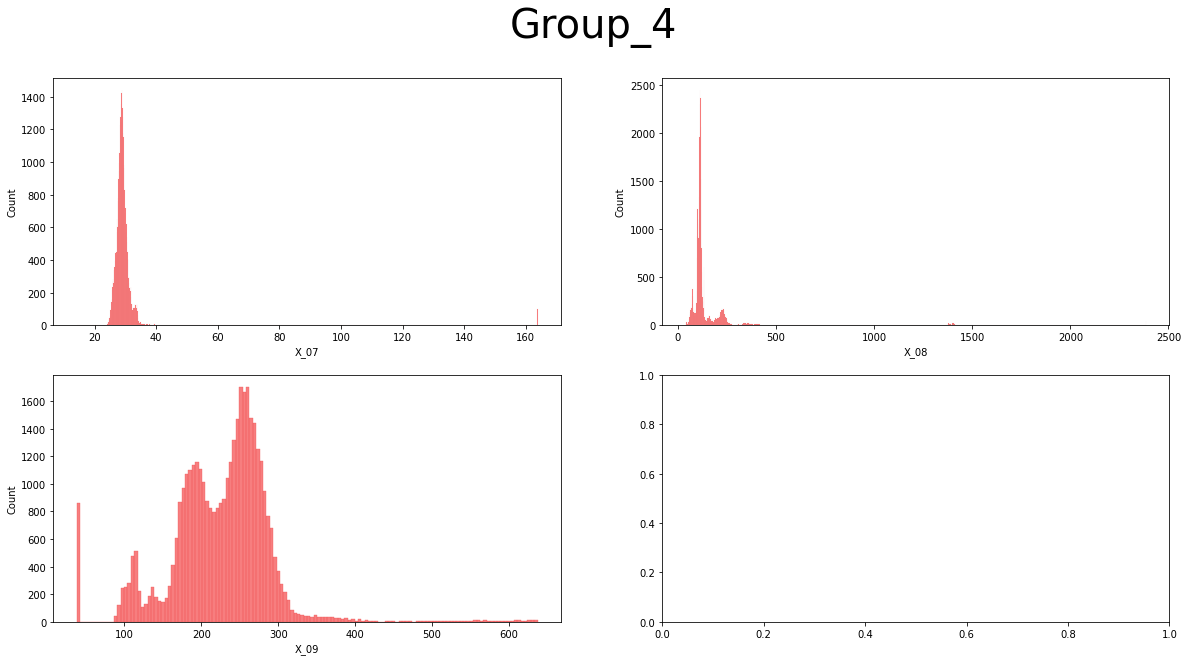

In [ ]:
show_hist("Group_4")

## Group 5 : 커넥터 위치 기준 좌표

In [ ]:
X.loc[:, group_dict["Group_5"]]

,X_12
0,4.34
1,4.38
2,4.36
3,4.33
4,4.35
...,...
39602,4.36
39603,4.40
39604,4.38
39605,4.33


X_12 : 커넥터 위치 기준 좌표


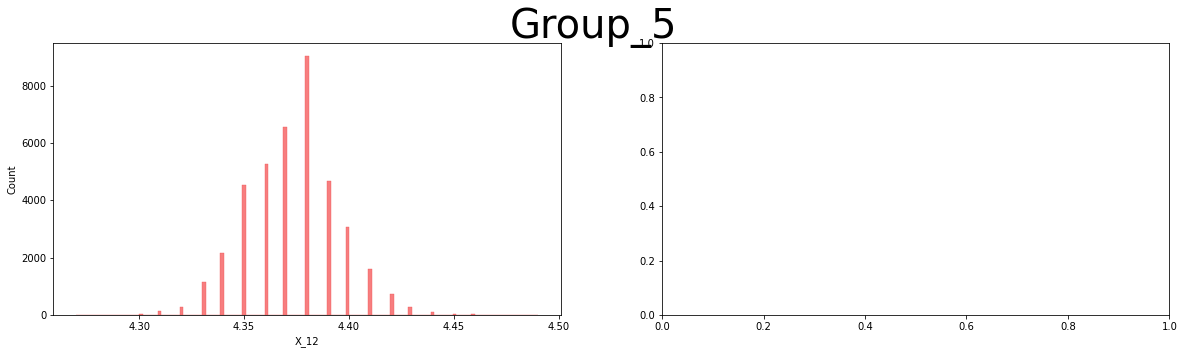

In [ ]:
show_hist("Group_5")

## Group 6 : 각 안테나 패드 위치(높이) 차이

In [ ]:
X.loc[:, group_dict["Group_6"]]

,X_13
0,0.18
1,0.18
2,0.15
3,0.21
4,0.16
...,...
39602,0.15
39603,0.13
39604,0.14
39605,0.16


X_13 : 각 안테나 패드 위치(높이) 차이


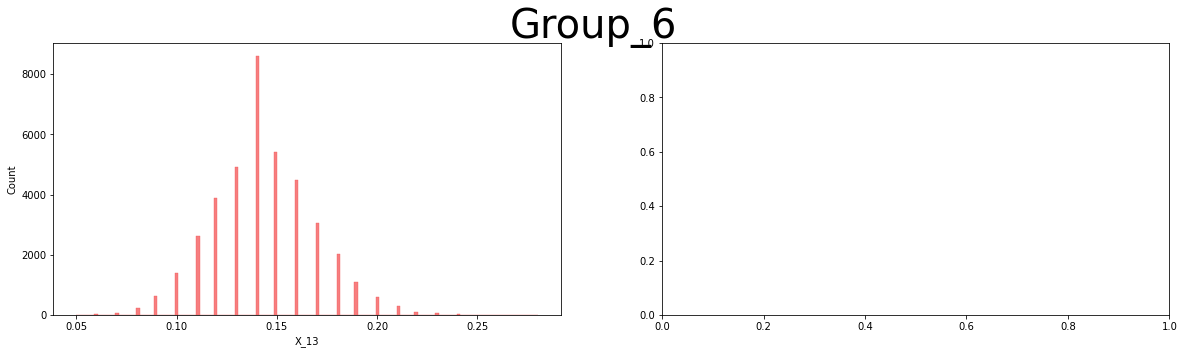

In [ ]:
show_hist("Group_6")

## Group 7 : n번 안테나 패드 위치

In [ ]:
X.loc[:, group_dict["Group_7"]]

,X_14,X_15,X_16,X_17,X_18
0,13.34,13.37,13.40,13.52,13.44
1,13.33,13.33,13.46,13.51,13.42
2,13.36,13.36,13.39,13.51,13.43
3,13.30,13.33,13.39,13.51,13.40
4,13.35,13.34,13.41,13.50,13.42
...,...,...,...,...,...
39602,13.37,13.38,13.51,13.52,13.46
39603,13.36,13.36,13.47,13.49,13.44
39604,13.38,13.39,13.47,13.52,13.46
39605,13.36,13.38,13.45,13.52,13.46


X_14 : 1번 안테나 패드 위치
X_15 : 2번 안테나 패드 위치
X_16 : 3번 안테나 패드 위치
X_17 : 4번 안테나 패드 위치
X_18 : 5번 안테나 패드 위치


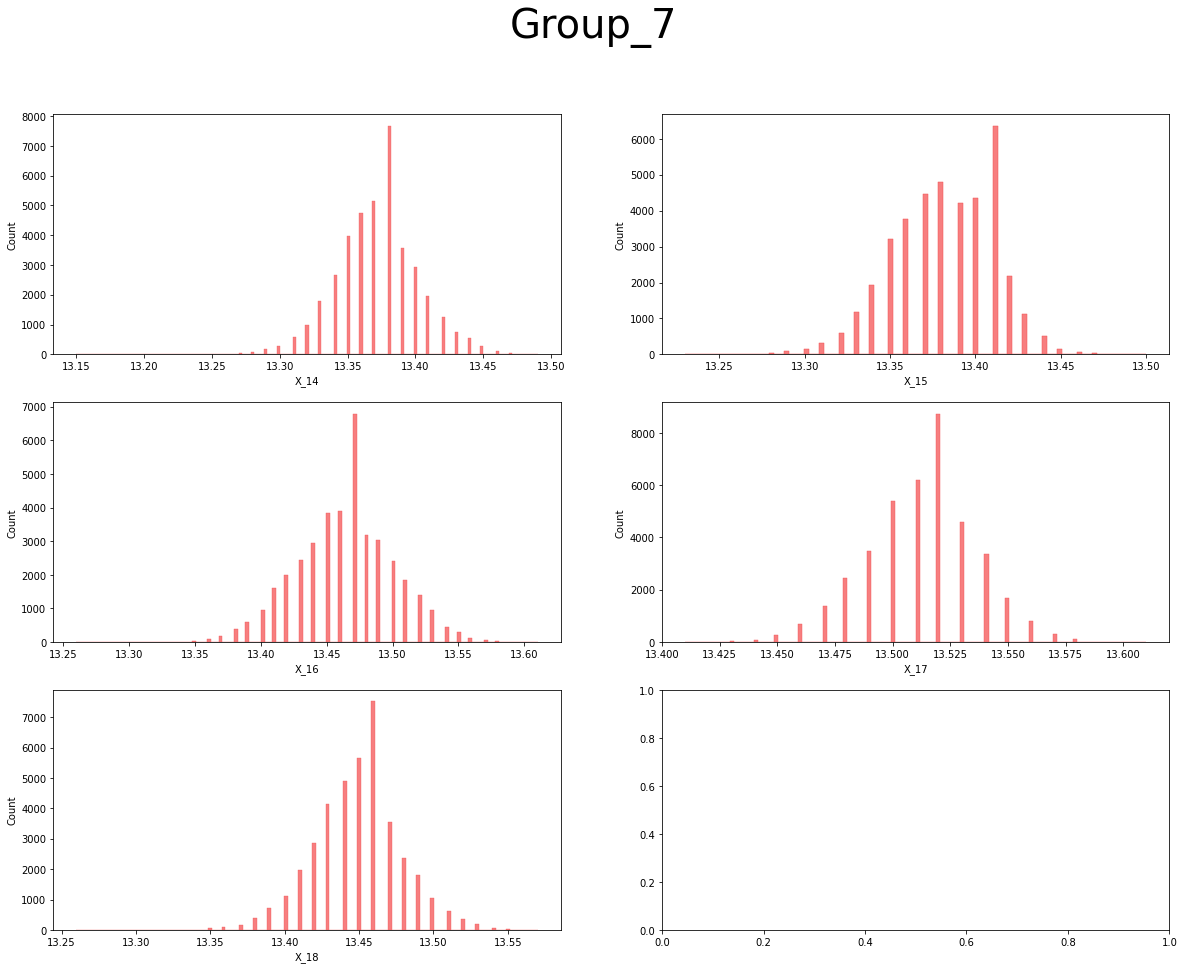

In [ ]:
show_hist("Group_7")

## Group 8 : n번 스크류 삽입 깊이

In [ ]:
X.loc[:, group_dict["Group_8"]]

,X_19,X_20,X_21,X_22
0,3.11,3.17,3.06,3.13
1,2.97,3.11,2.91,3.20
2,3.04,3.04,3.01,3.12
3,3.05,3.01,3.02,3.08
4,3.04,3.07,3.00,3.12
...,...,...,...,...
39602,3.20,3.03,3.06,3.13
39603,3.15,3.06,3.05,3.06
39604,3.23,3.09,3.07,3.12
39605,3.18,3.01,3.15,3.09


X_19 : 1번 스크류 삽입 깊이
X_20 : 2번 스크류 삽입 깊이
X_21 : 3번 스크류 삽입 깊이
X_22 : 4번 스크류 삽입 깊이


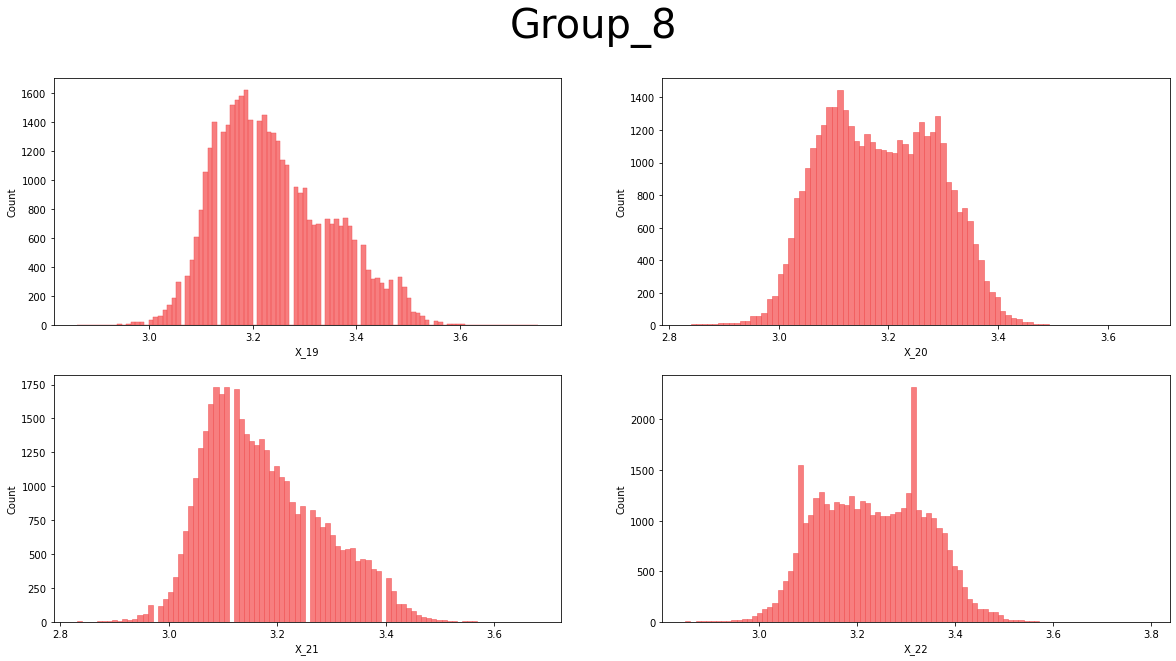

In [ ]:
show_hist("Group_8")

## Group 9 : 커넥터 n번 핀 치수

In [ ]:
X.loc[:, group_dict["Group_9"]]

,X_24,X_25,X_26,X_27,X_28,X_29
0,2.05,2.07,2.05,2.06,2.06,2.35
1,2.10,2.10,2.10,2.10,2.17,2.28
2,2.07,2.06,2.04,2.07,2.10,2.26
3,2.06,2.05,2.03,2.06,2.07,2.12
4,2.09,2.06,2.09,2.12,2.33,2.13
...,...,...,...,...,...,...
39602,2.10,2.11,2.08,2.11,2.10,2.20
39603,2.12,2.12,2.09,2.12,2.11,2.20
39604,2.13,2.09,2.08,2.07,2.12,2.16
39605,2.07,2.03,2.05,2.05,2.10,2.12


X_24 : 커넥터 1번 핀 치수
X_25 : 커넥터 2번 핀 치수
X_26 : 커넥터 3번 핀 치수
X_27 : 커넥터 4번 핀 치수
X_28 : 커넥터 5번 핀 치수
X_29 : 커넥터 6번 핀 치수


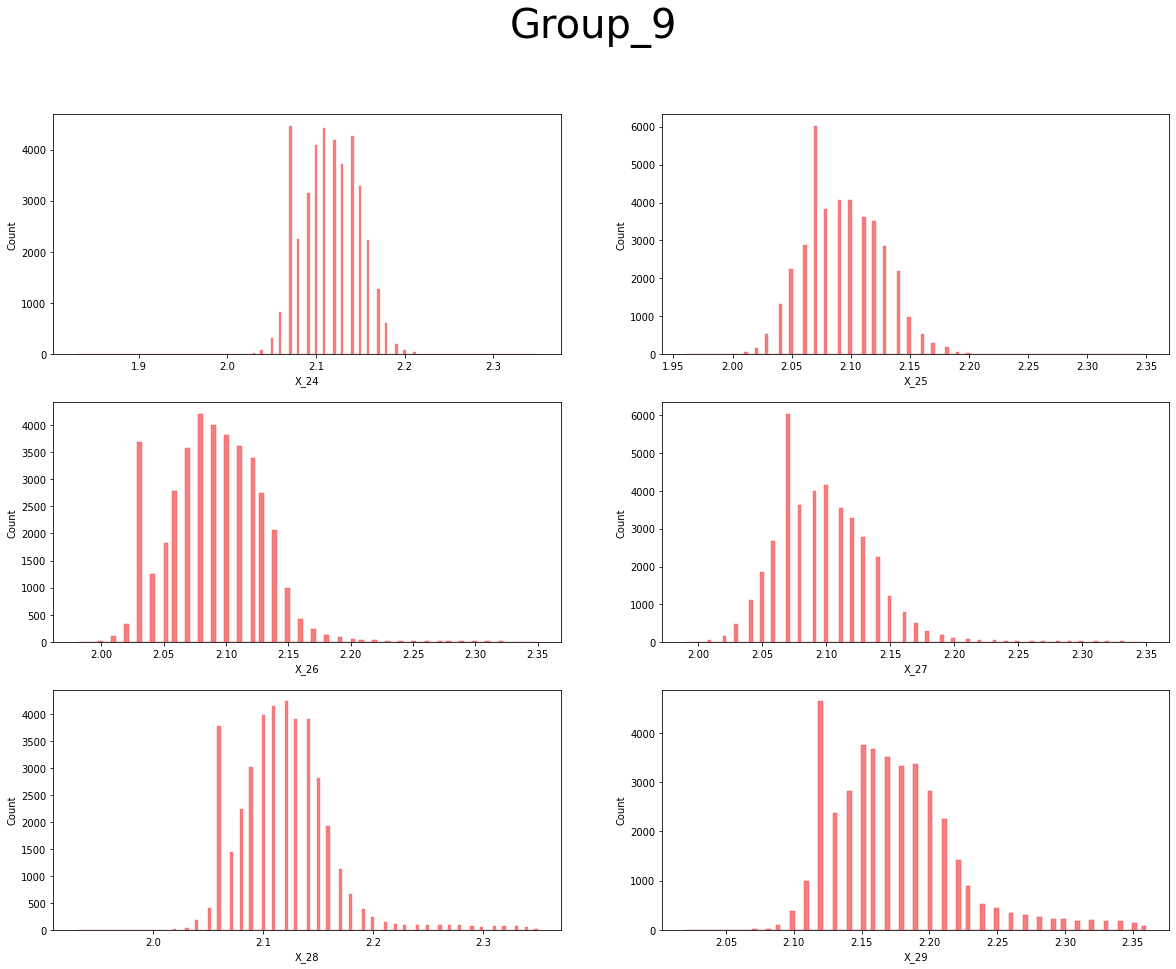

In [ ]:
show_hist("Group_9")

## Group 10 : 스크류 삽입 깊이n

In [ ]:
X.loc[:, group_dict["Group_10"]]

,X_30,X_31,X_32,X_33
0,1.49,1.69,1.46,1.74
1,1.49,1.67,1.45,1.66
2,1.49,1.69,1.46,1.68
3,1.47,1.68,1.47,1.68
4,1.49,1.68,1.47,1.82
...,...,...,...,...
39602,1.37,1.60,1.36,1.67
39603,1.40,1.68,1.37,1.77
39604,1.39,1.61,1.37,1.58
39605,1.37,1.56,1.36,1.67


X_30 : 스크류 삽입 깊이1
X_31 : 스크류 삽입 깊이2
X_32 : 스크류 삽입 깊이3
X_33 : 스크류 삽입 깊이4


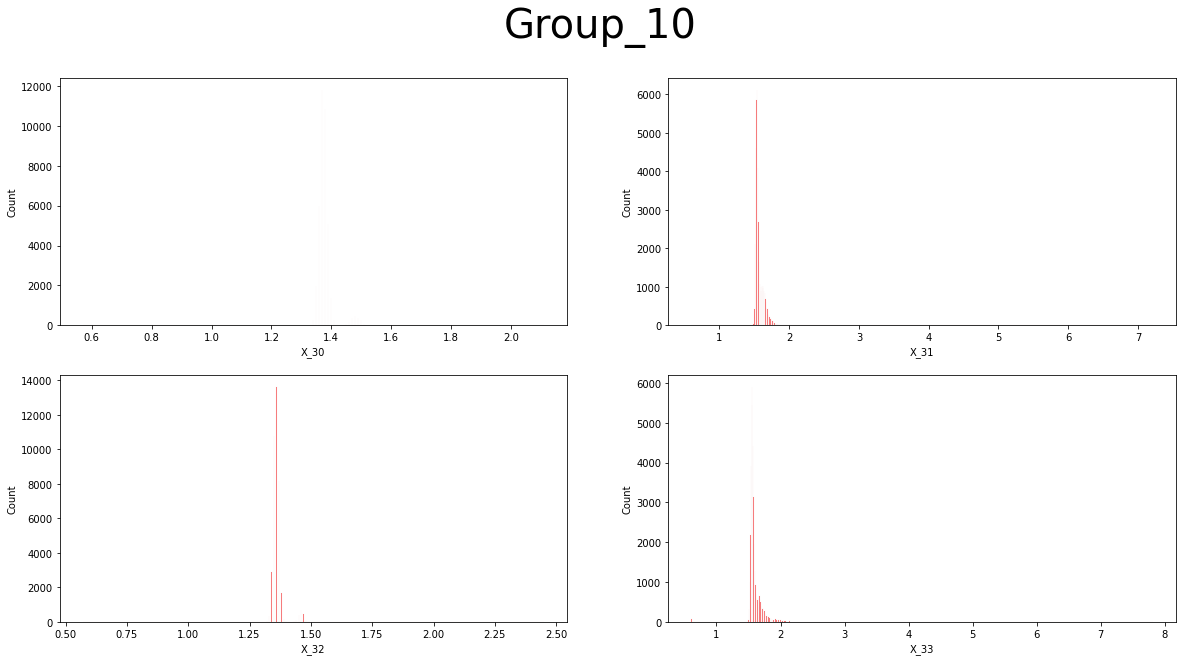

In [ ]:
show_hist("Group_10")

## Group 11 : 스크류 체결 시 분당 회전수 n

In [ ]:
X.loc[:, group_dict["Group_11"]]

,X_34,X_35,X_36,X_37
0,12.99,12.88,12.89,12.99
1,12.92,12.87,12.89,12.93
2,12.97,12.87,12.87,13.00
3,12.91,12.97,12.99,12.92
4,12.96,12.85,12.91,12.96
...,...,...,...,...
39602,12.89,13.00,12.94,12.90
39603,12.88,12.88,12.89,12.86
39604,12.98,12.98,12.98,12.81
39605,12.91,12.90,12.96,12.97


X_34 : 스크류 체결 시 분당 회전수 1
X_35 : 스크류 체결 시 분당 회전수 2
X_36 : 스크류 체결 시 분당 회전수 3
X_37 : 스크류 체결 시 분당 회전수 4


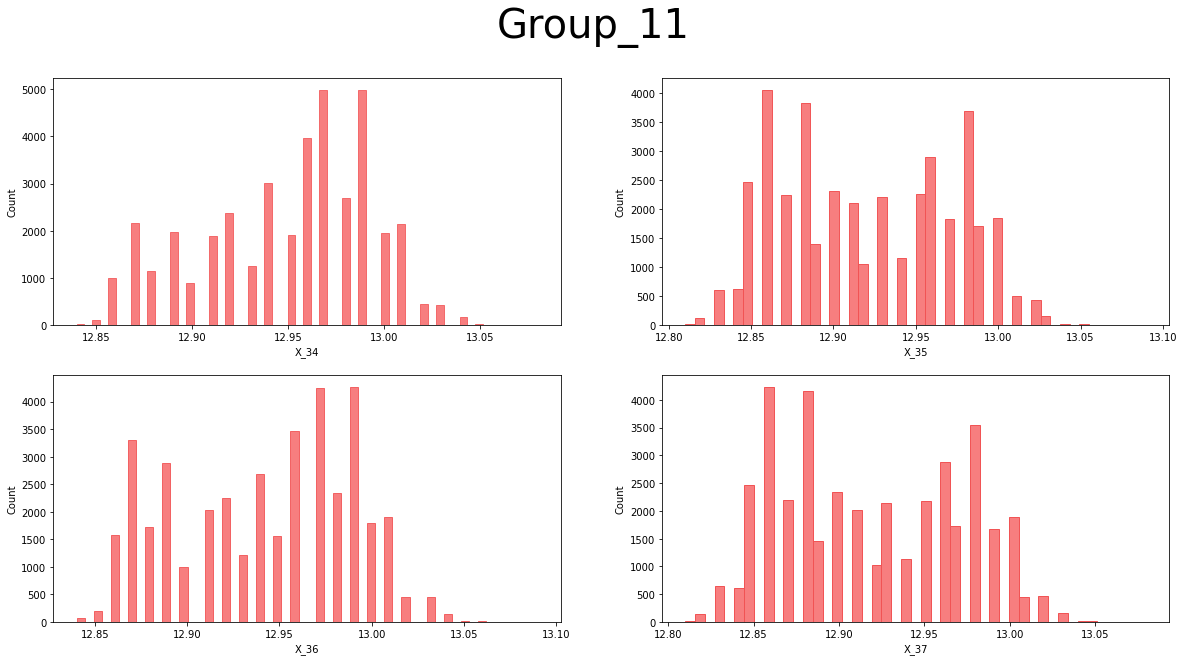

In [ ]:
show_hist("Group_11")

## Group 12 : 하우징 PCB 안착부 n 치수

In [ ]:
X.loc[:, group_dict["Group_12"]]

,X_38,X_39,X_40
0,-16.41,-16.36,-17.03
1,-16.06,-16.11,-16.74
2,-16.16,-16.17,-16.76
3,-16.05,-16.03,-16.67
4,-16.25,-16.23,-16.85
...,...,...,...
39602,-16.09,-16.15,-16.79
39603,-15.70,-15.74,-16.40
39604,-16.12,-16.19,-16.80
39605,-16.36,-16.36,-16.97


X_38 : 하우징 PCB 안착부 1 치수
X_39 : 하우징 PCB 안착부 2 치수
X_40 : 하우징 PCB 안착부 3 치수


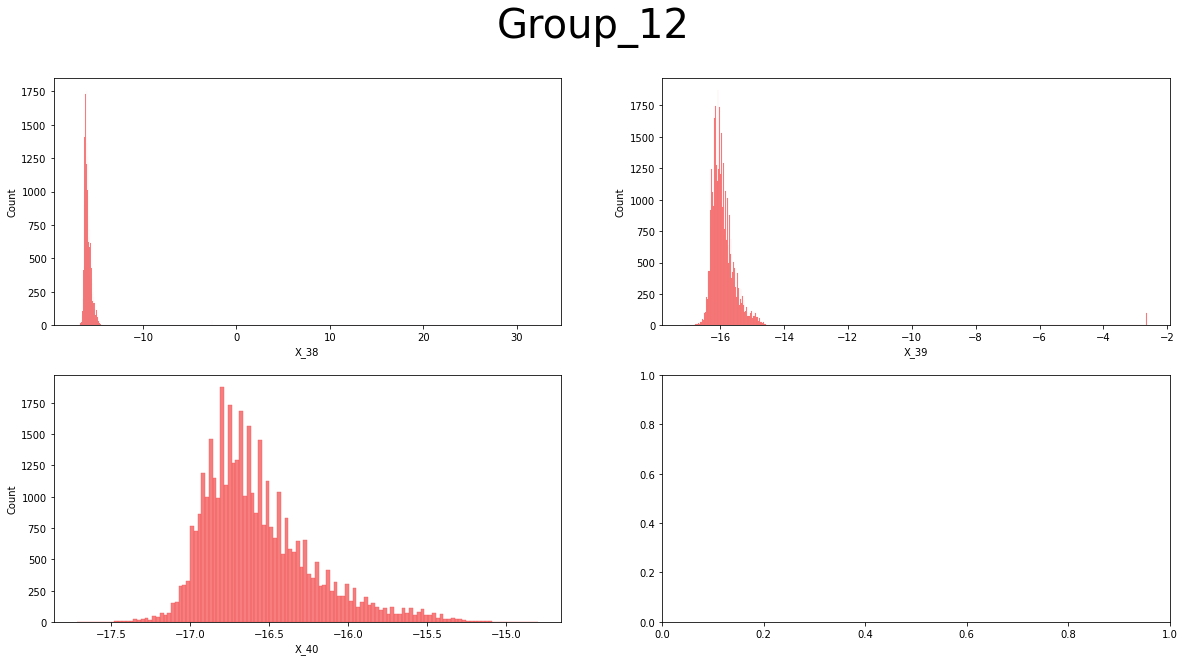

In [ ]:
show_hist("Group_12")

## Group 13 : 레이돔 치수 (안테나 n번 부위)

In [ ]:
X.loc[:, group_dict["Group_13"][0]]

0        21.20
1        21.16
2        21.13
3        21.18
4        21.16
         ...  
39602    21.17
39603    21.16
39604    21.17
39605    21.15
39606    21.17
Name: X_41, Length: 39607, dtype: float64

X_41 : 레이돔 치수 (안테나 1번 부위)
X_42 : 레이돔 치수 (안테나 2번 부위)
X_43 : 레이돔 치수 (안테나 3번 부위)
X_44 : 레이돔 치수 (안테나 4번 부위)


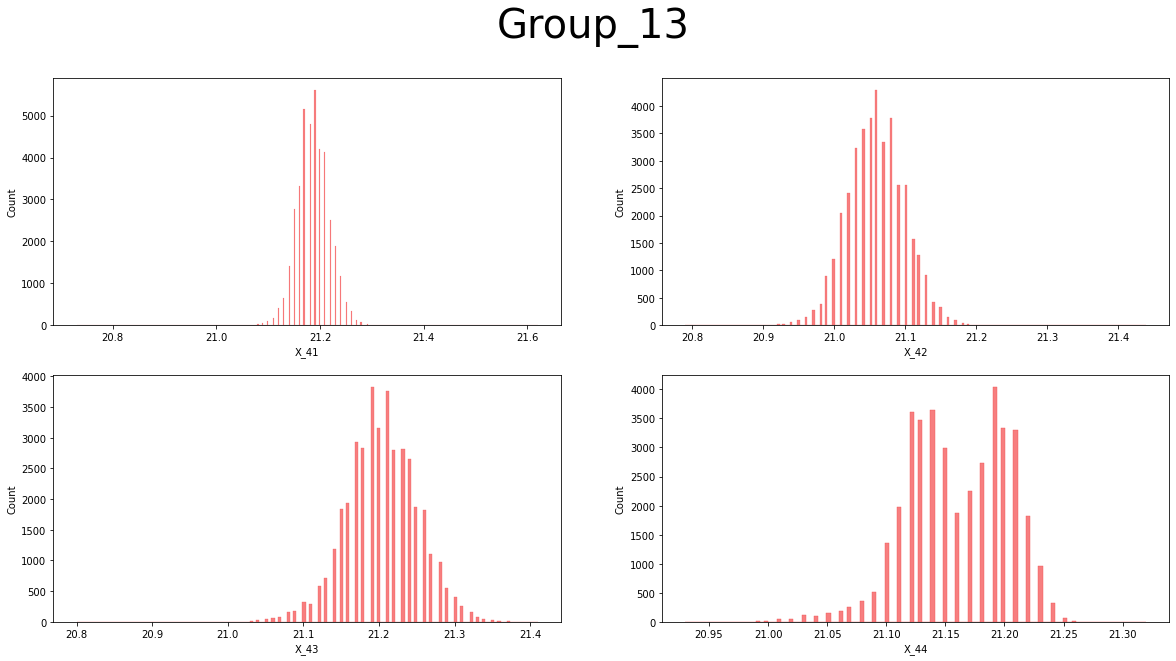

In [ ]:
show_hist("Group_13")

## Group 14 : 안테나 부분 레이돔 기울기

In [ ]:
X.loc[:, group_dict["Group_14"] ]

,X_45
0,0.29
1,0.13
2,0.14
3,0.22
4,0.22
...,...
39602,0.11
39603,0.12
39604,0.13
39605,0.11


X_45 : 안테나 부분 레이돔 기울기


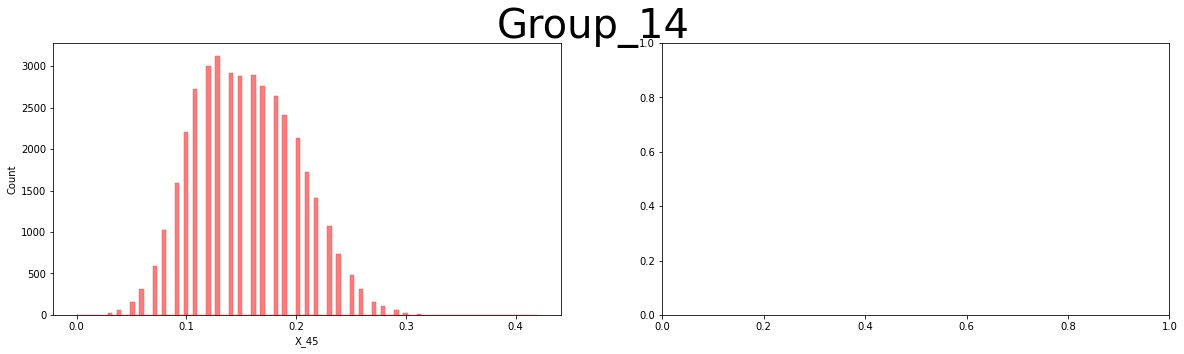

In [ ]:

show_hist("Group_14")

## Group 15 : 실란트 본드 소요량

X_46 : 실란트 본드 소요량


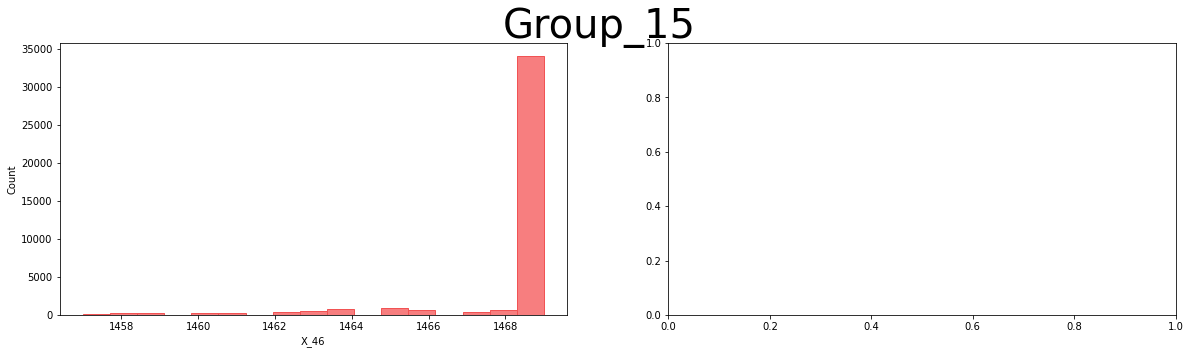

In [ ]:
X.loc[:, group_dict["Group_15"]]

df = pd.DataFrame(df_train)
df['X_46']
df_train['X_46'] = df_train['X_46'].replace(1457,1469)

group_dict = {
    "Group_1" : ["X_01", "X_02", "X_05", "X_06"],
    "Group_2" : ["X_03", "X_10", "X_11"],
    "Group_3" : ["X_04", "X_23", "X_47", "X_48"],
    "Group_4" : ["X_07", "X_08", "X_09"],
    "Group_5" : ["X_12"],
    "Group_6" : ["X_13"],
    "Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"],
    "Group_8" : ["X_19", "X_20", "X_21", "X_22"],
    "Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"],
    "Group_10" : ["X_30", "X_31", "X_32", "X_33"],
    "Group_11" : ["X_34", "X_35", "X_36", "X_37"],
    "Group_12" : ["X_38", "X_39", "X_40"],
    "Group_13" : ["X_41", "X_42", "X_43", "X_44"],
    "Group_14" : ["X_45"],
    "Group_15" : ["X_46"],
    "Group_16" : ["X_49"],  
    "Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"],
}


show_hist("Group_15")

## Group 16 : Cal 투입 전 대기 시간

In [ ]:
X.loc[:, group_dict["Group_16"]]

,X_49
0,9706.03
1,10423.43
2,10948.53
3,15007.03
4,11051.03
...,...
39602,60630.73
39603,60763.43
39604,8813.33
39605,62222.33


X_49 : Cal 투입 전 대기 시간


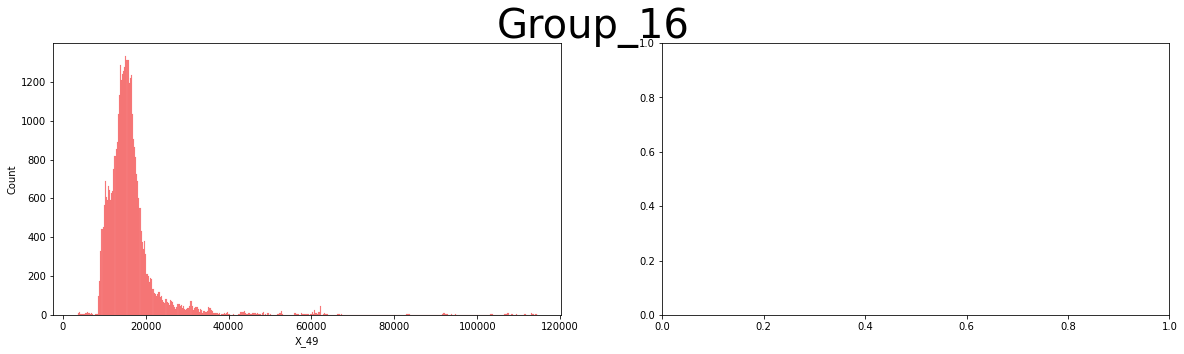

In [ ]:
show_hist("Group_16")

## Group 17 : RFn 부분 SMT 납 량

In [ ]:
X.loc[:, group_dict["Group_17"]]

,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256
1,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308
2,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232
3,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225
4,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762
...,...,...,...,...,...,...,...
39602,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812
39603,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413
39604,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699
39605,128.189679,121.495930,141.288011,130.141676,125.518825,136.603634,124.525929


X_50 : RF1 부분 SMT 납 량
X_51 : RF2 부분 SMT 납 량
X_52 : RF3 부분 SMT 납 량
X_53 : RF4 부분 SMT 납 량
X_54 : RF5 부분 SMT 납 량
X_55 : RF6 부분 SMT 납 량
X_56 : RF7 부분 SMT 납 량


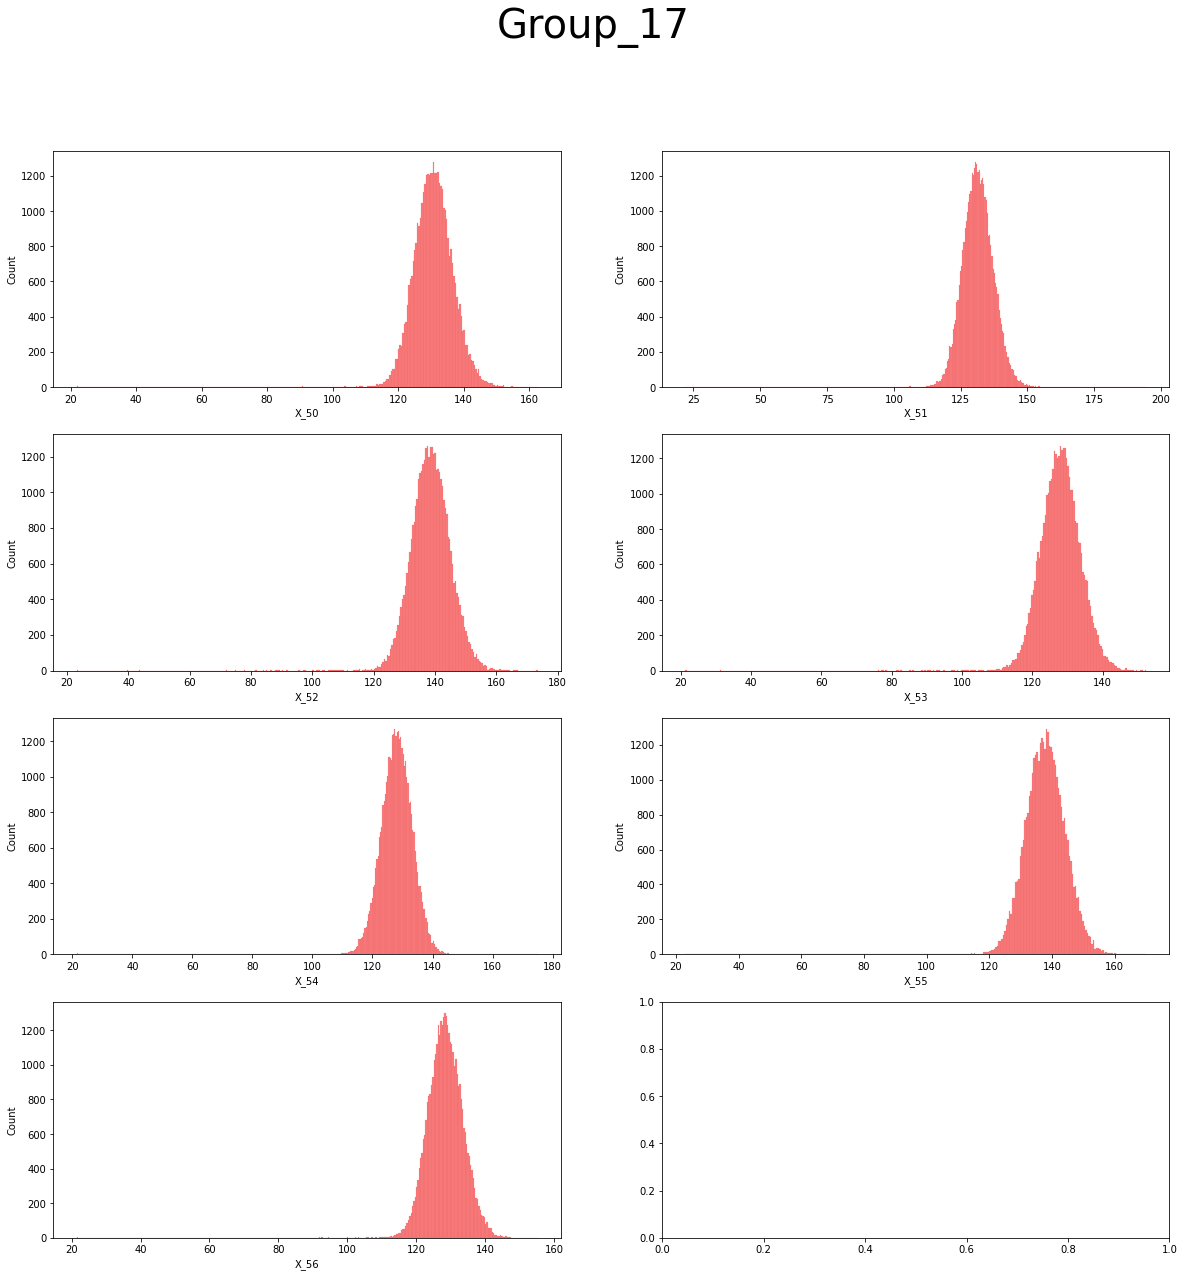

In [ ]:
show_hist("Group_17")

# 하다 만 것

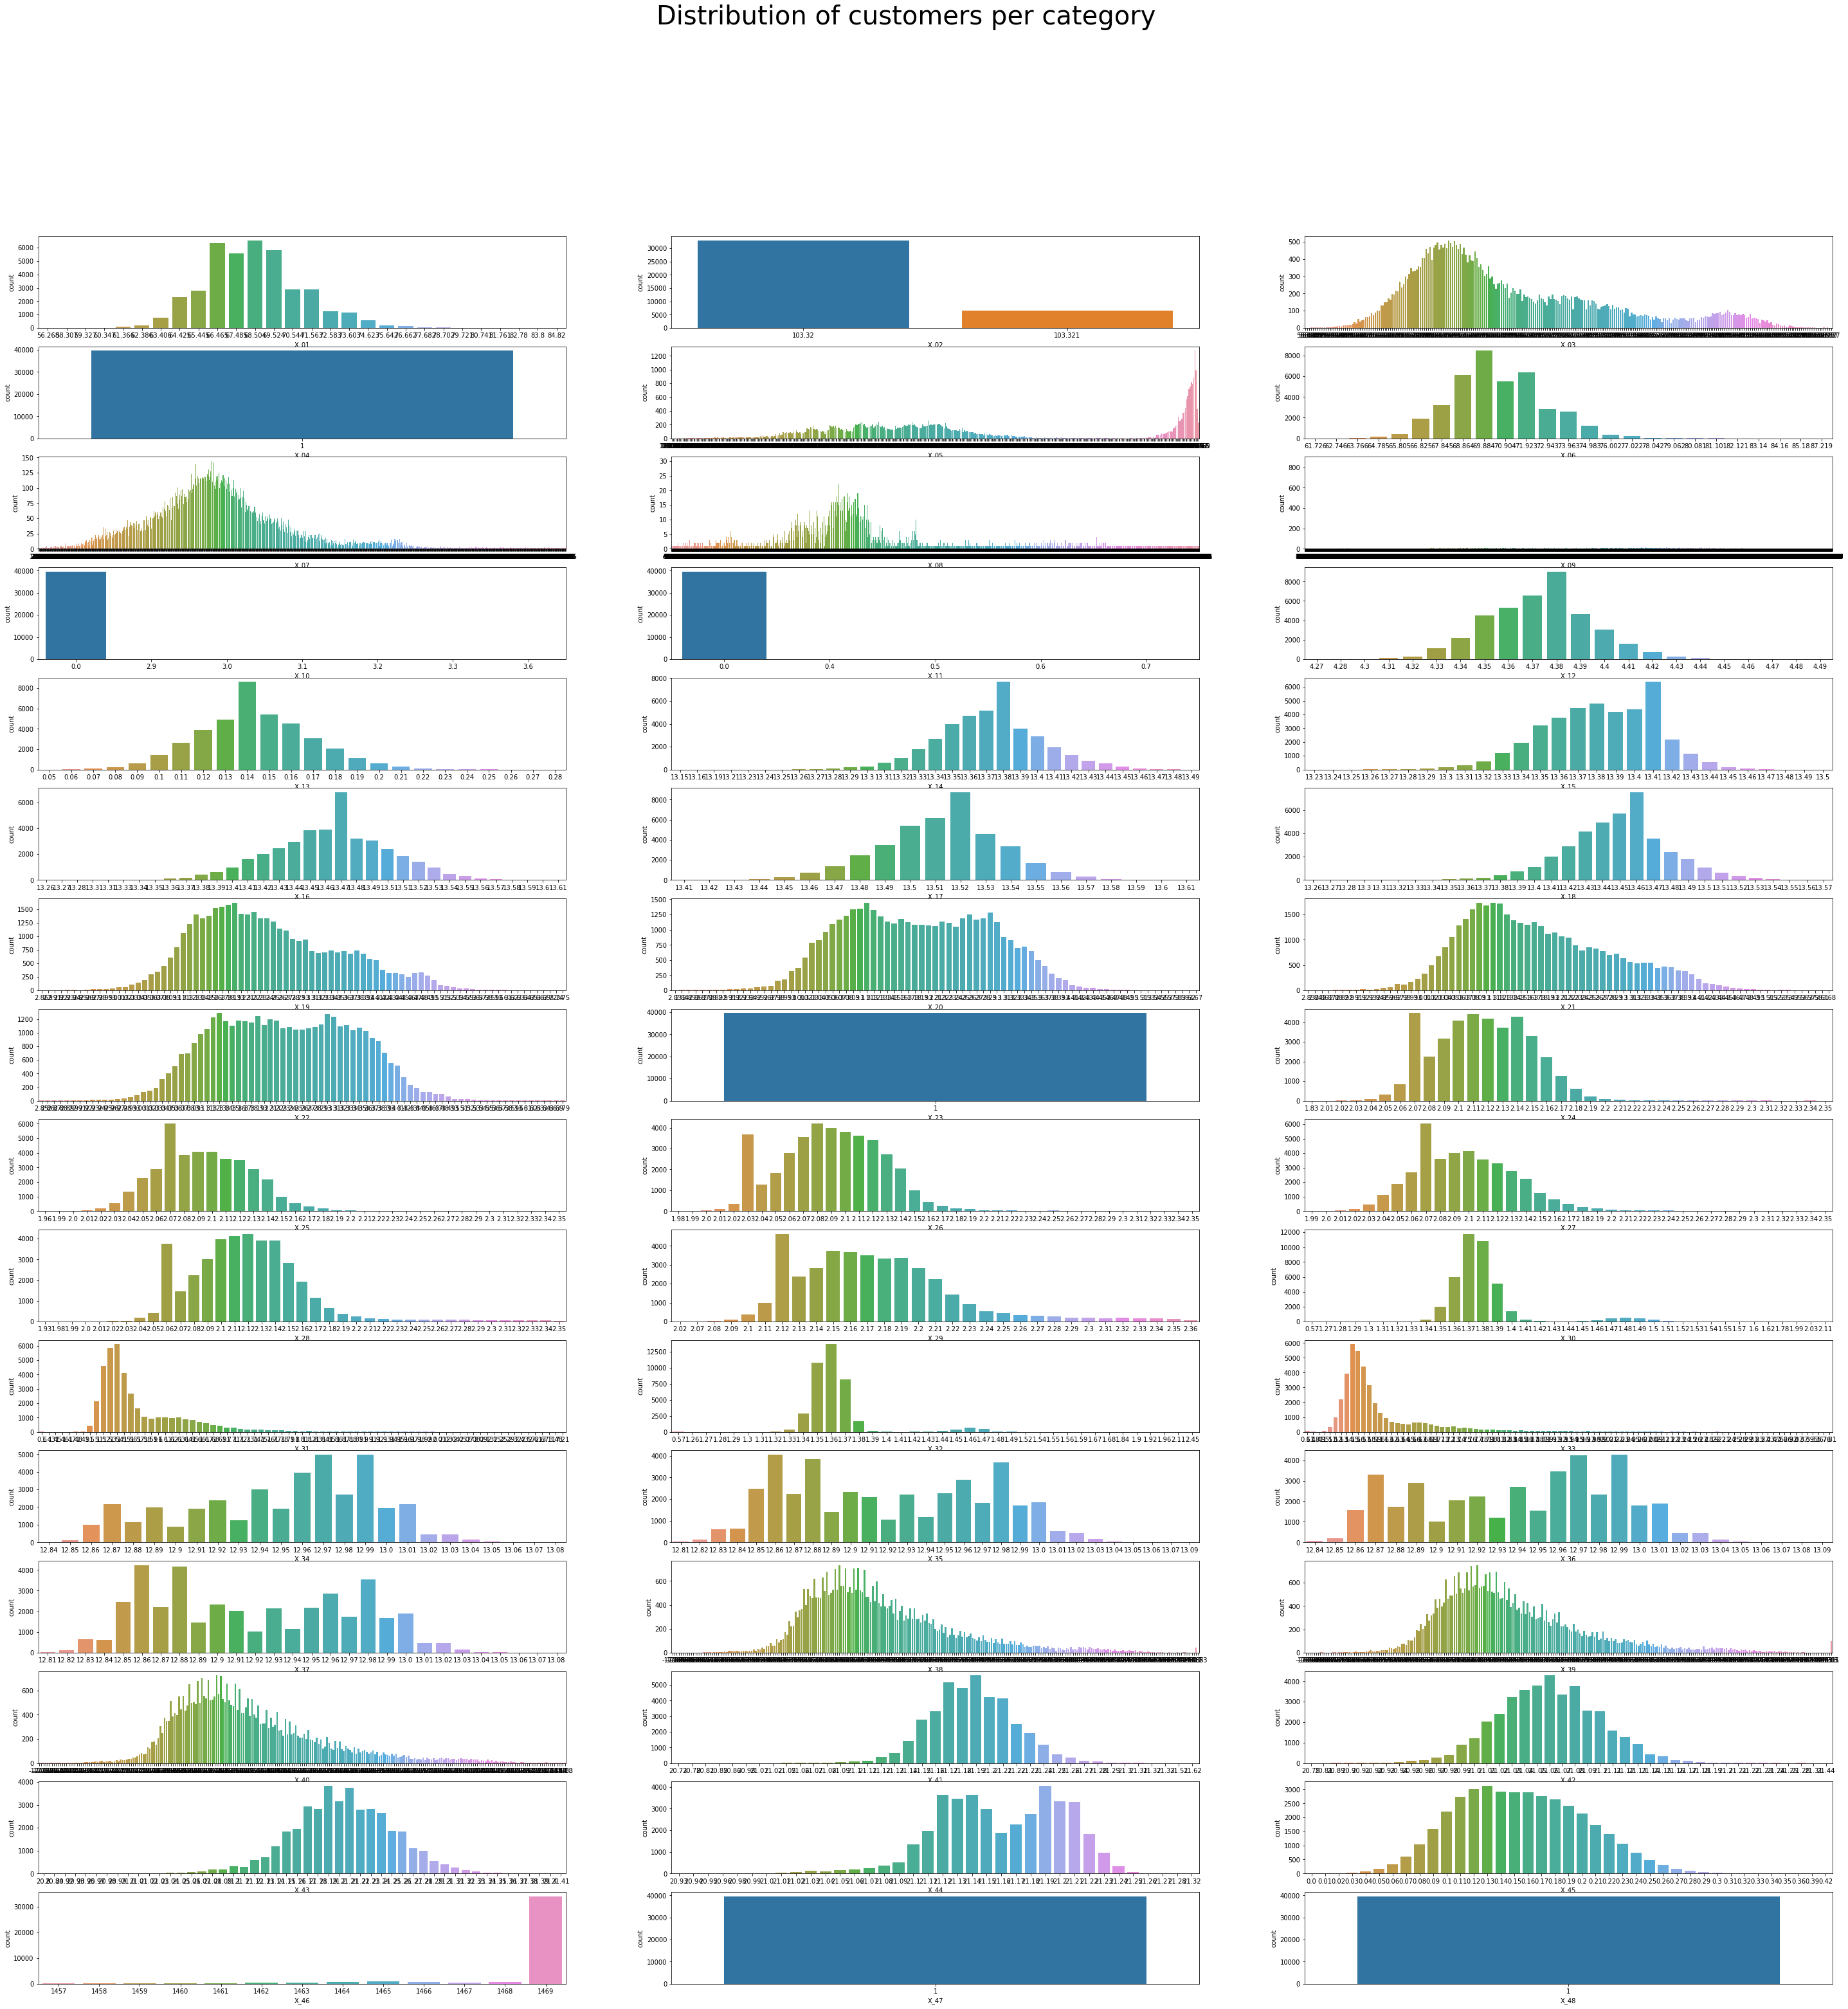

In [ ]:
fig, axes = plt.subplots(16, 3, figsize=(50,50))
fig.suptitle('Distribution of customers per category', fontsize=40)

for ax, feature in zip(axes.flatten(),list(X.columns)):
    sns.countplot(data = X, x = feature, ax=ax)
plt.show()

## Boxplot

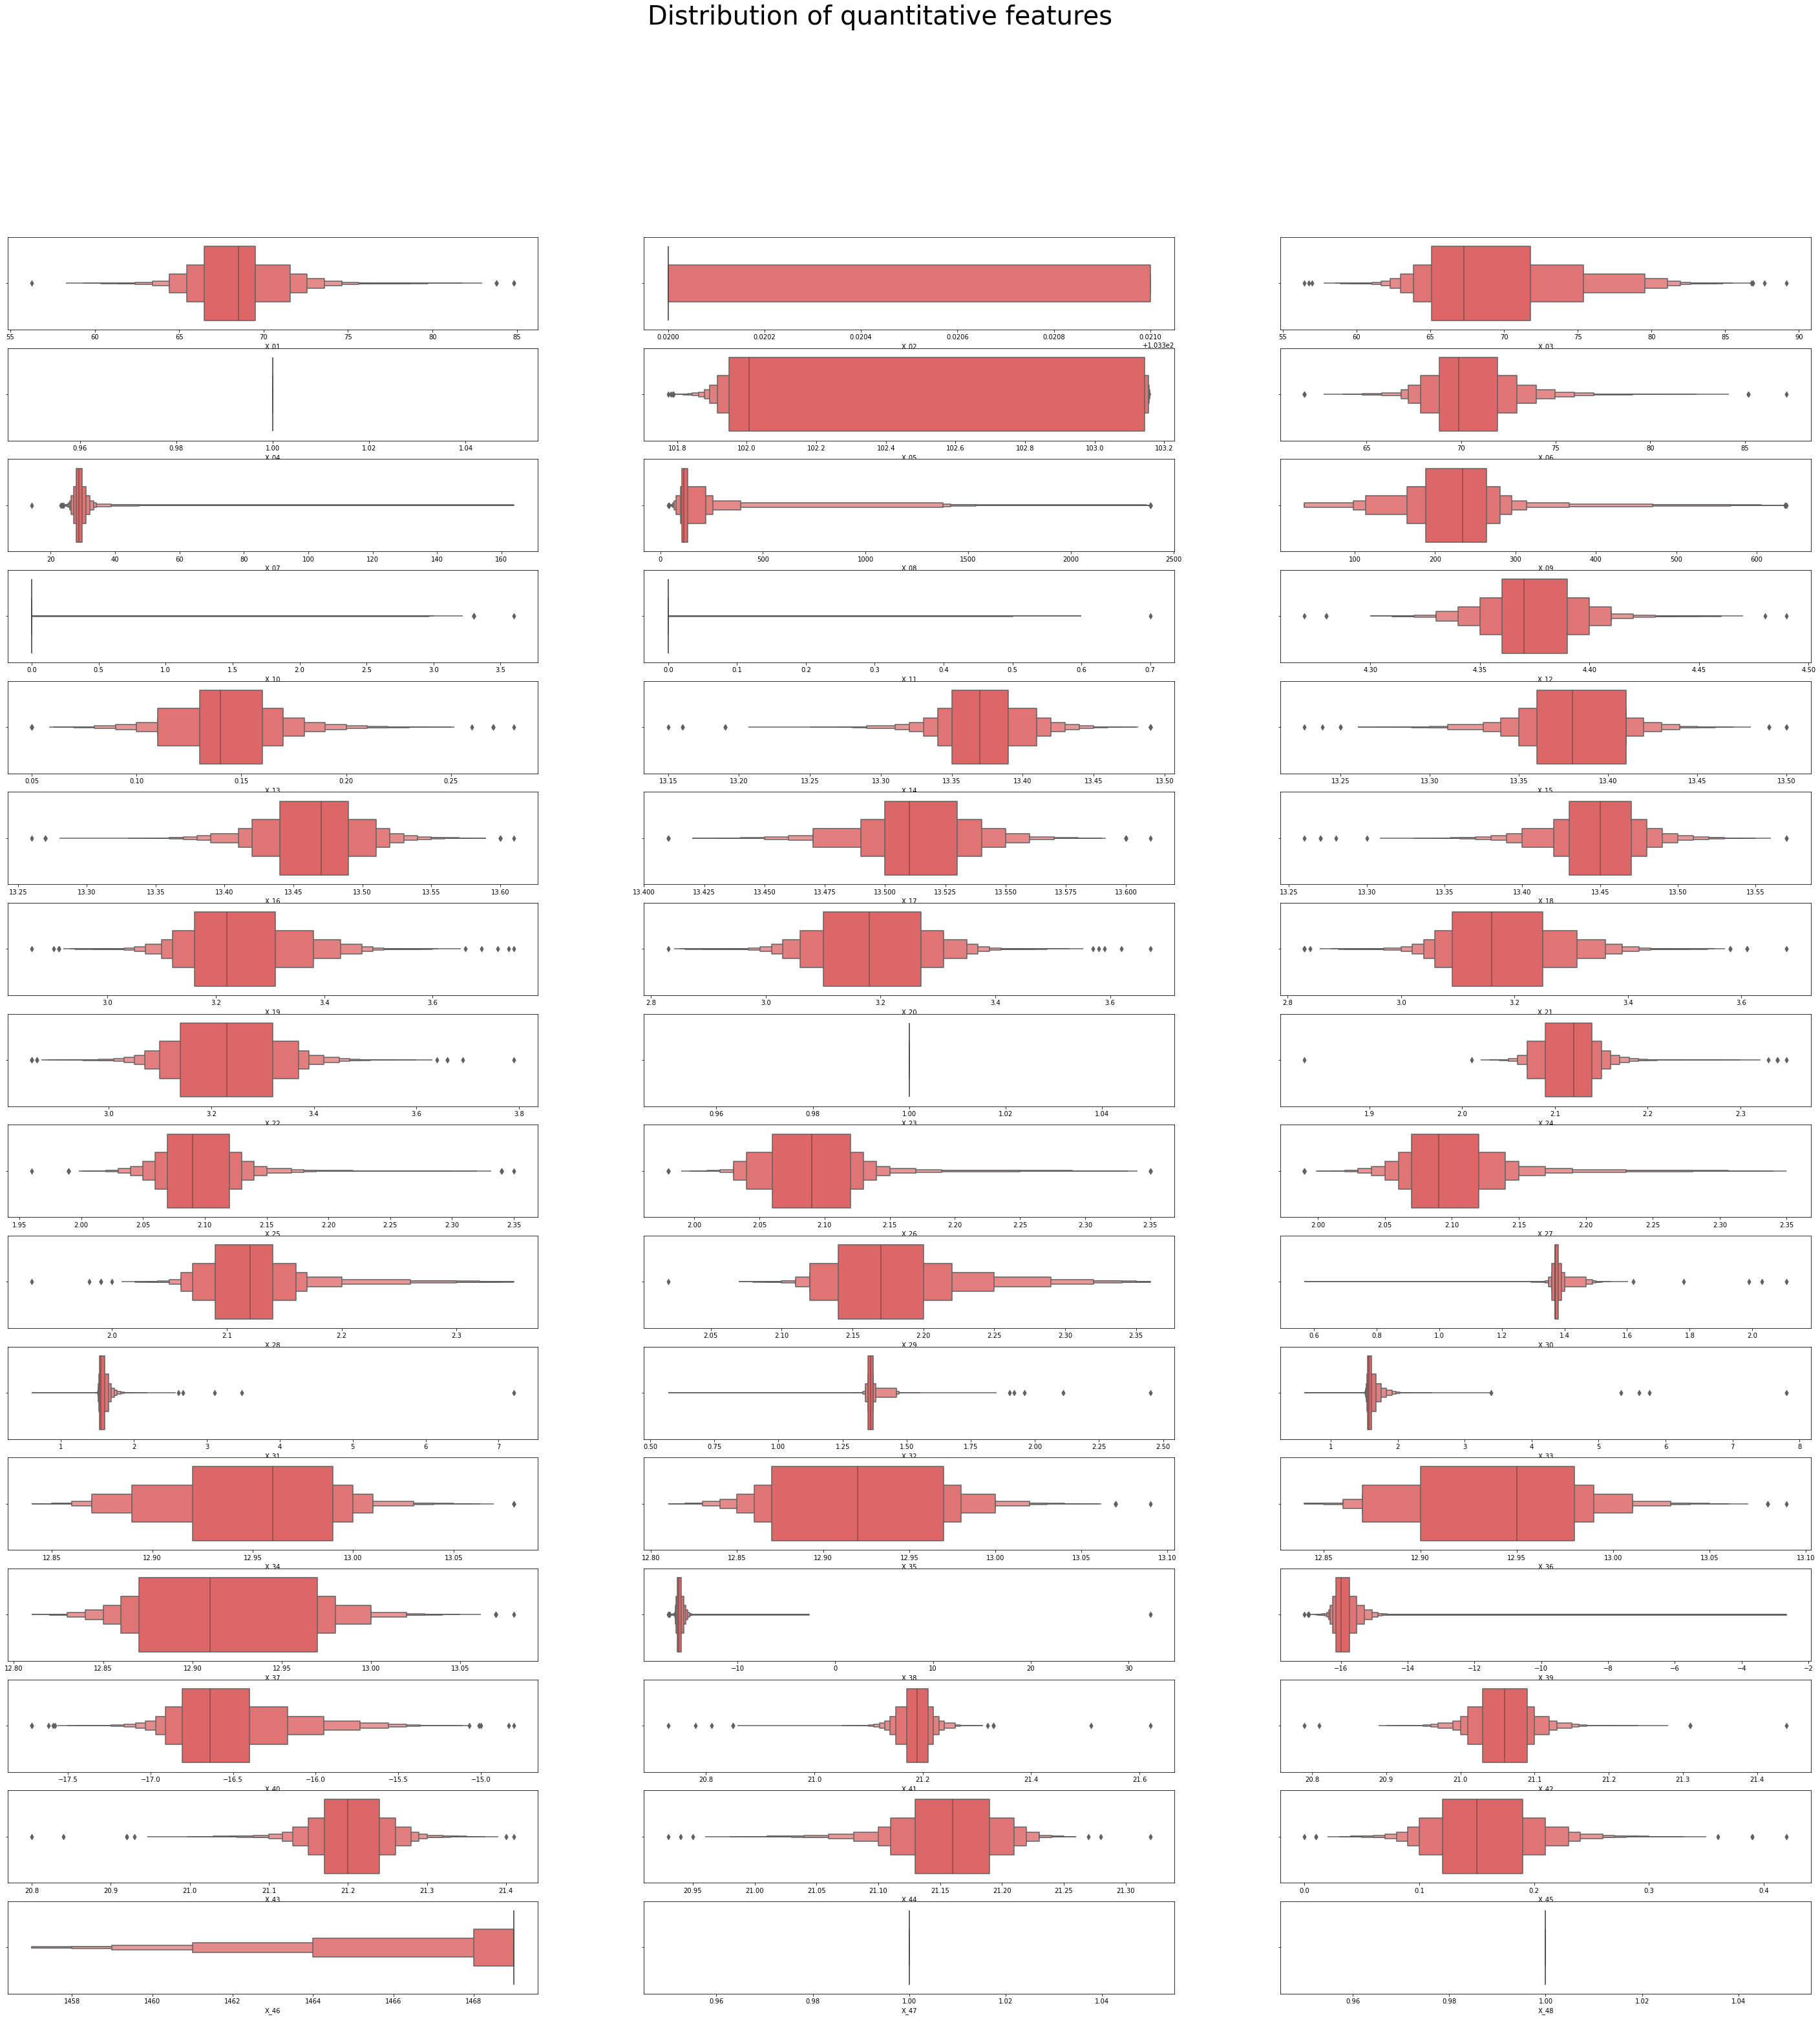

In [ ]:
fig, axes = plt.subplots(16,3, figsize=(50,50))
fig.suptitle('Distribution of quantitative features', fontsize=40)
#plt.tight_layout()

for ax,feature in zip(axes.flatten(),list(X.columns)):
    sns.boxenplot(data = X, x = feature, ax=ax, color='#f15354')
plt.show()

In [ ]:
from scipy import stats
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return lower_bound, upper_bound

outliers = X[list(X.columns)].apply(lambda column: IQR(column))
print('Range of outliers by method')
outliers

Range of outliers by method


,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,61.8765,103.32,55.02,1.0,100.1565,64.2755,24.92,66.045,75.41,0.0,...,1.0,1.0,6394.555,115.56293,116.418254,122.134830,113.508320,114.513564,121.250605,115.077135
1,74.1125,103.32,81.82,1.0,104.9365,76.5115,32.84,172.565,377.09,0.0,...,1.0,1.0,24259.555,145.92464,146.422265,155.043018,142.484868,141.671738,154.566599,141.897341


In [ ]:
from scipy import stats
def IQR(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return lower_bound, upper_bound
X_1 = X.query('lower_bound <=')
print('Range of outliers by method')
outliers

SyntaxError: ignored

In [ ]:
from re import I
def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data < lower_bound))


pay_lead_outlier_index_X_41 = outliers_iqr(df_train["X_41"])[0]
df_train.loc[pay_lead_outlier_index_X_41,"X_41"]

pay_lead_outlier_index_X_42 = outliers_iqr(df_train["X_42"])[0]
df_train.loc[pay_lead_outlier_index_X_42,"X_42"]

pay_lead_outlier_index_X_43 = outliers_iqr(df_train["X_43"])[0]
df_train.loc[pay_lead_outlier_index_X_43,"X_43"]

pay_lead_outlier_index_X_44 = outliers_iqr(df_train["X_44"])[0]
df_train.loc[pay_lead_outlier_index_X_44,"X_44"]

pay_lead_outlier_index_X_45 = outliers_iqr(df_train["X_45"])[0]
df_train.loc[pay_lead_outlier_index_X_45,"X_45"]

pay_lead_outlier_index_X_46 = outliers_iqr(df_train["X_46"])[0]
df_train.loc[pay_lead_outlier_index_X_46,"X_46"]

pay_lead_outlier_index_X_49 = outliers_iqr(df_train["X_49"])[0]
df_train.loc[pay_lead_outlier_index_X_49,"X_49"]

pay_lead_outlier_index_X_50 = outliers_iqr(df_train["X_50"])[0]
df_train.loc[pay_lead_outlier_index_X_50,"X_50"]

pay_lead_outlier_index_X_51 = outliers_iqr(df_train["X_51"])[0]
df_train.loc[pay_lead_outlier_index_X_51,"X_51"]

pay_lead_outlier_index_X_52 = outliers_iqr(df_train["X_52"])[0]
df_train.loc[pay_lead_outlier_index_X_52,"X_52"]

pay_lead_outlier_index_X_53 = outliers_iqr(df_train["X_53"])[0]
df_train.loc[pay_lead_outlier_index_X_53,"X_53"]

pay_lead_outlier_index_X_54 = outliers_iqr(df_train["X_54"])[0]
df_train.loc[pay_lead_outlier_index_X_54,"X_54"]

pay_lead_outlier_index_X_55 = outliers_iqr(df_train["X_55"])[0]
df_train.loc[pay_lead_outlier_index_X_55,"X_55"]

pay_lead_outlier_index_X_56 = outliers_iqr(df_train["X_56"])[0]
df_train.loc[pay_lead_outlier_index_X_56,"X_56"]

In [ ]:
# from re import I
# def outliers_iqr(data):
#   q1, q3 = np.percentile(data, [25,75])
#   iqr = q3 - q1
#   lower_bound = q1 - (iqr * 1.5)
#   upper_bound = q3 + (iqr * 1.5)

#   return np.where((data > upper_bound)|(data < lower_bound))
# Name_a = [ ]
# a = ["X_01", "X_02", "X_05", "X_06","X_03", "X_10", "X_11","X_04", "X_23", "X_47", "X_48","X_07", "X_08", "X_09","X_12","X_13"]
# for i in a:
#   Name = i
#   pay_lead_outlier_index_X_01 = outliers_iqr(df_train[i])
#   df_train.loc[pay_lead_outlier_index_X_01,i]


In [ ]:
# from scipy import stats
# print(X)
# # Q1 =  X[list(X.columns)].quantile(0.25)
# # Q3 =  X[list(X.columns)].quantile(0.75)
# # IQR = Q3 - Q1
# # lower_bound = Q1 -(1.5 * IQR)
# # upper_bound = Q3 +(1.5 * IQR)
# # X_1 = X[list(X.columns)]>upper_bound 
# # print(X_1)
# # outliers = X[list(X.columns)].apply(lambda column: IQR(column))
# # print('Range of outliers by method')

# # print(X[condition)
# # outliers

In [ ]:
def IQRsum(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -(1.5 * IQR)
    upper_bound = Q3 +(1.5 * IQR)
    return ((column < lower_bound) | (column > upper_bound)).sum()

outliers = X[list(X.columns)].drop([], axis = 1).apply(lambda column: IQRsum(column))
print('Number of outliers by method')
outliers



In [ ]:
list(X.columns).append('target')

## 상관관계 확인하기

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:


# 수치형 데이터 상관관계 히트맵 시각화
train_corr = X.copy()
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(30,30))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [ ]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['???'].sort_values(ascending=False), columns=['target'])
df_temp28.style.background_gradient(cmap='viridis')